# Exploratory Data Analysis

In [2]:
import pandas as pd

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
all_data = pd.read_csv("~/work/ym/SearchResults.tsv", sep="\t")

In [22]:
all_data.shape

(3422, 27)

In [14]:
all_data.head(5)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04372602,Duvelisib to Combat COVID-19,NaN,Not yet recruiting,No Results Available,COVID-19,Drug: Duvelisib|Procedure: Peripheral blood dr...,Overall survival|Length of hospital stay|Lengt...,Washington University School of Medicine|Veras...,All,"18 Years and older (Adult, Older Adult)",Phase 2,28.0,Other|Industry,Interventional,Allocation: Randomized|Intervention Model: Sin...,202007009,"September 30, 2020","October 31, 2021","March 31, 2022","May 4, 2020",NaN,"September 10, 2020","Washington University School of Medicine, Sain...",NaN,https://ClinicalTrials.gov/show/NCT04372602
1,2,NCT04364698,Observational Cohort of COVID-19 Patients at R...,COVID-RPC,Recruiting,No Results Available,COVID-19,NaN,"clinical, biological and radiological characte...",Assistance Publique - Hôpitaux de Paris,All,"18 Years and older (Adult, Older Adult)",NaN,500.0,Other,Observational,Observational Model: Cohort|Time Perspective: ...,20SBS-COVID-RPC,"May 7, 2020",June 2020,June 2020,"April 28, 2020",NaN,"May 14, 2020","Department of Infectiology, Raymond Poincaré H...",NaN,https://ClinicalTrials.gov/show/NCT04364698
2,3,NCT04482621,Decitabine for Coronavirus (COVID-19) Pneumoni...,DART,Recruiting,No Results Available,COVID-19,Drug: Decitabine|Other: Placebo Saline,Change in clinical state as assessed by a 6-po...,Johns Hopkins University,All,"18 Years and older (Adult, Older Adult)",Phase 2,40.0,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,IRB00247544,"August 31, 2020",January 2021,July 2021,"July 22, 2020",NaN,"August 18, 2020","Johns Hopkins University, Baltimore, Maryland,...",NaN,https://ClinicalTrials.gov/show/NCT04482621
3,4,NCT04459637,COVID-19 Surveillance Based on Smart Wearable ...,COVID-19SWD,Not yet recruiting,No Results Available,COVID-19,NaN,Deterioration of the condition|Mortality|The i...,Peking University First Hospital,All,"18 Years to 75 Years (Adult, Older Adult)",NaN,200.0,Other,Observational,Observational Model: Cohort|Time Perspective: ...,2020055-0615,"July 1, 2020","March 10, 2021","March 10, 2021","July 7, 2020",NaN,"July 7, 2020","Peking University First Hospital, Beijing, Bei...",NaN,https://ClinicalTrials.gov/show/NCT04459637
4,5,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,NaN,Recruiting,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,Tufts Medical Center|National Institutes of He...,All,"18 Years and older (Adult, Older Adult)",Phase 2,17.0,Other|NIH,Interventional,Allocation: N/A|Intervention Model: Single Gro...,STUDY00000564,"June 1, 2020",September 2020,December 2020,"June 11, 2020",NaN,"June 11, 2020","Tufts Medical Center, Boston, Massachusetts, U...",NaN,https://ClinicalTrials.gov/show/NCT04425538


## Now we will focus on the expected duration of clinical trials

In [47]:
all_data['Start Date'][0]

'September 30, 2020'

In [29]:
start_end = pd.DataFrame(all_data, columns = ["Start Date", "Completion Date"]).dropna()
start_end.shape

(3397, 2)

In [55]:
##### Calculate days #####
# from datetime import datetime
# test1 = datetime.strptime('Jun 1, 2005', '%b %d, %Y')
# test2 = datetime.strptime('Sep 2, 2006', '%b %d, %Y')
# x = test1 - test2
# x.days
# def convert_to_date(date_str):
#     mo, d_y = date_str.split(" ", 1)
#     return mo[0:3] + ' ' + d_y

# def range_days(row):
#     try:
#         start = datetime.strptime(convert_to_date(row[0]), '%b %d, %Y')
#         end = datetime.strptime(convert_to_date(row[1]), '%b %d, %Y')
#         return (end-start).days
#     except:
#         return None
# d = start_end.apply(range_days, axis = 1)

In [120]:
month = {'January': 1,
         'February': 2,
         'March': 3,
         'April': 4,
         'May': 5,
         'June': 6,
         'July': 7,
         'August': 8,
         'September': 9,
         'October': 10,
         'November': 11,
         'December': 12}

def convert_to_month(date_str):
    d = date_str.split(" ")
    if len(d) == 2 and d[0] in month:
        return [d[0], d[1]]
    elif len(d) == 3 and d[0] in month:
        return [d[0], d[2]]
    else:
        return None
    
def range_month(row):
    start = convert_to_month(row[0]) if convert_to_month(row[0]) else None
    end = convert_to_month(row[1]) if convert_to_month(row[1]) else None
#     if int(end[1]) > 2023:
#         print(end[1])
    try:
        res = (int(end[1])-int(start[1]))*12 + (month[end[0]]-month[start[0]])
        return res if res>=0 else None
    except:
        return None

In [121]:
m = start_end.apply(range_month, axis = 1).dropna()
print("First 20 month range:")
m.head(20)

First 20 month range:


0     18
1      1
2     11
3      8
4      6
5      6
6      3
7     14
8     11
9      4
10     7
11     4
12     3
13    36
14     9
15     7
16     6
17     5
18    12
19    12
dtype: int64

In [255]:
print("Max month")
print(max(m))
print("Min month")
print(min(m))
print("Avg month")
print(round(sum(m)/len(m), 3))

Max month
956
Min month
0
Avg month
11.623


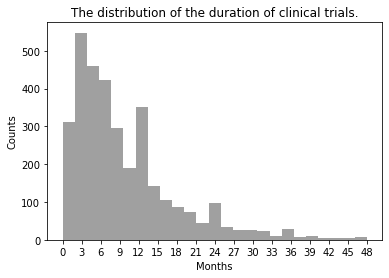

In [146]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
%matplotlib inline

n, bins, patches = plt.hist(m, bins = 25, range = [0, 48], facecolor='gray', alpha=0.75)
plt.xlabel('Months')
plt.ylabel('Counts')
ax=plt.gca()
x_major_locator=MultipleLocator(3)
ax.xaxis.set_major_locator(x_major_locator)
plt.title('The distribution of the duration of clinical trials.')
plt.show()

We can see that most of the duration of the clinical trials are less than a year.

## Next let's move to `Study Designs`

In [147]:
study_design = all_data["Study Designs"]

Convert and expand the `Study Designs` field into a DataFrame.

In [187]:
def parse_study_design(row):
    try:
        dic = {}
        row = row.split("|")
        for item in row:
            item = item.split(":")
            dic[item[0].strip()] = item[1].strip()
        return dic
    except:
        return None

In [256]:
# Test only
# df = study_design[0:10].apply(parse_study_design)
# df2 = pd.json_normalize(df)
# df2
df = study_design.apply(parse_study_design).dropna()
df = pd.json_normalize(df)
df.head(10)

,Allocation,Intervention Model,Masking,Primary Purpose,Observational Model,Time Perspective
0,Randomized,Single Group Assignment,"Triple (Participant, Care Provider, Investigator)",Treatment,NaN,NaN
1,NaN,NaN,NaN,NaN,Cohort,Prospective
2,Randomized,Parallel Assignment,"Double (Participant, Investigator)",Treatment,NaN,NaN
3,NaN,NaN,NaN,NaN,Cohort,Prospective
4,N/A,Single Group Assignment,None (Open Label),Treatment,NaN,NaN
5,Randomized,Parallel Assignment,None (Open Label),Treatment,NaN,NaN
6,Randomized,Parallel Assignment,"Double (Participant, Care Provider)",Treatment,NaN,NaN
7,Randomized,Parallel Assignment,"Triple (Participant, Care Provider, Investigator)",Treatment,NaN,NaN
8,Randomized,Parallel Assignment,"Double (Participant, Investigator)",Treatment,NaN,NaN
9,Randomized,Parallel Assignment,None (Open Label),Treatment,NaN,NaN


We can see that there are 6 sub-level fields inside `Sduty Designs` field, including `Allocation`, `Intervention Model`, `Masking`, `Primary Purpose`, `Observational Model`, `Time Perspective`.

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Allocation           1922 non-null   object
 1   Intervention Model   1933 non-null   object
 2   Masking              1933 non-null   object
 3   Primary Purpose      1933 non-null   object
 4   Observational Model  1464 non-null   object
 5   Time Perspective     1464 non-null   object
dtypes: object(6)
memory usage: 159.4+ KB


In [236]:
# for c in list(df.columns):
#     print("The details of " + str(i) + ":")
#     print(df.groupby([c]).size())
#     print()

In [239]:
df.groupby(["Allocation"]).size()

Allocation
N/A                341
Non-Randomized     164
Randomized        1417
dtype: int64

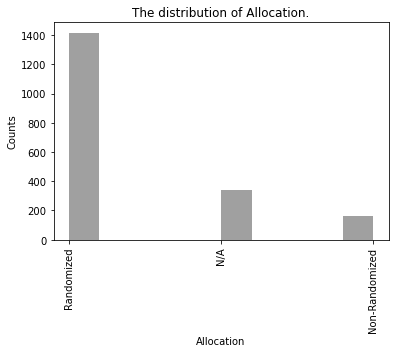

In [240]:
n, bins, patches = plt.hist(df["Allocation"].dropna(), facecolor='gray', alpha=0.75)
plt.xlabel('Allocation')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('The distribution of Allocation.')
plt.show()

In [241]:
df.groupby(["Intervention Model"]).size()

Intervention Model
Crossover Assignment         50
Factorial Assignment         30
Parallel Assignment        1376
Sequential Assignment        98
Single Group Assignment     379
dtype: int64

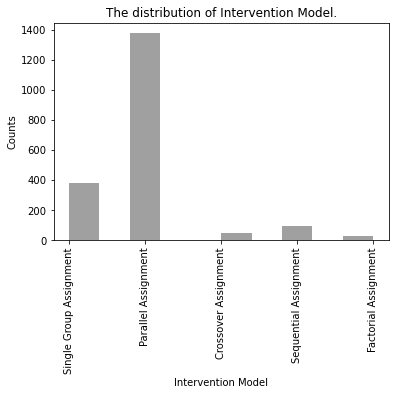

In [242]:
n, bins, patches = plt.hist(df["Intervention Model"].dropna(), facecolor='gray', alpha=0.75)
plt.xlabel('Intervention Model')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('The distribution of Intervention Model.')
plt.show()

In [243]:
df.groupby(["Masking"]).size()

Masking
Double (Care Provider, Investigator)                                          1
Double (Care Provider, Outcomes Assessor)                                     3
Double (Investigator, Outcomes Assessor)                                     22
Double (Participant, Care Provider)                                          35
Double (Participant, Investigator)                                          143
Double (Participant, Outcomes Assessor)                                      26
None (Open Label)                                                          1045
Quadruple (Participant, Care Provider, Investigator, Outcomes Assessor)     289
Single (Care Provider)                                                        5
Single (Investigator)                                                        16
Single (Outcomes Assessor)                                                  104
Single (Participant)                                                         85
Triple (Care Provider, Investiga

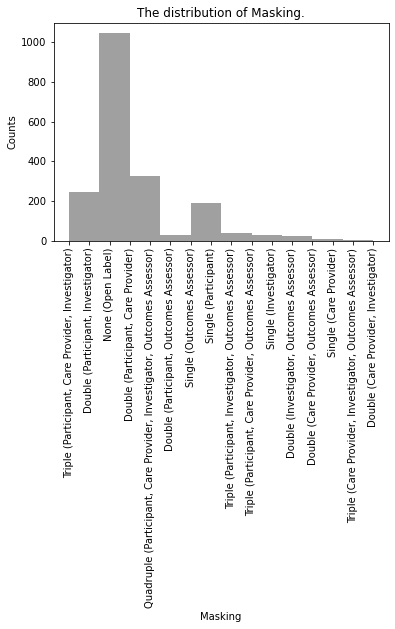

In [244]:
n, bins, patches = plt.hist(df["Masking"].dropna(), facecolor='gray', alpha=0.75)
plt.xlabel('Masking')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('The distribution of Masking.')
plt.show()

In [245]:
df.groupby(["Primary Purpose"]).size()

Primary Purpose
Basic Science                 21
Device Feasibility             6
Diagnostic                    78
Health Services Research      36
Other                         88
Prevention                   277
Screening                     18
Supportive Care               86
Treatment                   1323
dtype: int64

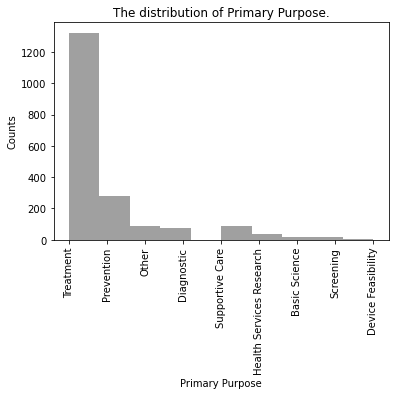

In [246]:
n, bins, patches = plt.hist(df["Primary Purpose"].dropna(), facecolor='gray', alpha=0.75)
plt.xlabel('Primary Purpose')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('The distribution of Primary Purpose.')
plt.show()

In [247]:
df.groupby(["Observational Model"]).size()

Observational Model
Case-Control             139
Case-Crossover            13
Case-Only                167
Cohort                   915
Ecologic or Community     56
Family-Based               7
Other                    167
dtype: int64

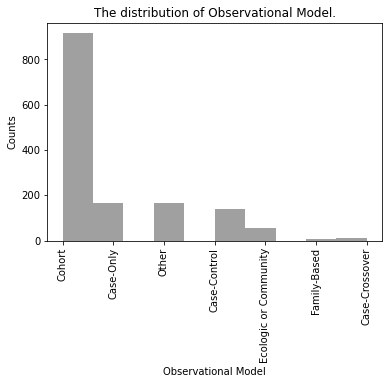

In [248]:
n, bins, patches = plt.hist(df["Observational Model"].dropna(), facecolor='gray', alpha=0.75)
plt.xlabel('Observational Model')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('The distribution of Observational Model.')
plt.show()

In [250]:
df.groupby(["Time Perspective"]).size()

Time Perspective
Cross-Sectional    180
Other              109
Prospective        901
Retrospective      274
dtype: int64

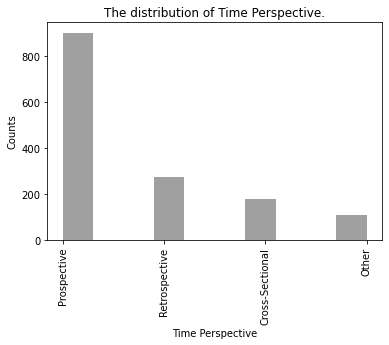

In [249]:
n, bins, patches = plt.hist(df["Time Perspective"].dropna(), facecolor='gray', alpha=0.75)
plt.xlabel('Time Perspective')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('The distribution of Time Perspective.')
plt.show()